## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

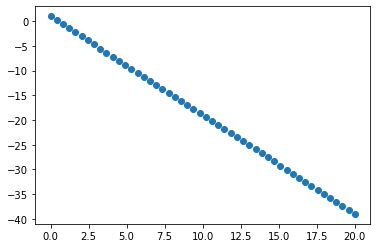

In [5]:
plt.scatter(X, y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def GD_SV(x,y,alpha,iterations):
    theta_0 = 0
    theta_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")
        
        
        
        if i > 0 and abs(MSE - loss[i-1]) < 0.01:
            break

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")

        if GVN < 0.01:
            break

        theta_0 = theta_0 - alpha*d_theta_0
        theta_1 = theta_1 - alpha*d_theta_1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)
    epochs = np.arange(i)
        
    return th_0,th_1,loss,output,epochs

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
t0,t1,loss,output,epochs = GD_SV(X,y,0.0005,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 

j = 249.88775510204084 

d_theta_0 : 19.0
d_theta_1 : 259.38775510204084
Gradient Vector:[[ 19.       ]
 [259.3877551]] 

Gradient Vector Norm: 260.08269357432516


j = 0.3135416538153325 

d_theta_0 : 0.17855070073188264
d_theta_1 : 6.329722939167262
Gradient Vector:[[0.1785507 ]
 [6.32972294]] 

Gradient Vector Norm: 6.332240743950918 

theta_0_new : -0.1313419902689154 

theta_1_new : -1.8721845199045404 

****************** Iteration 54 ********************
h(x):[ -0.13134199  -0.89549894  -1.65965588  -2.42381283  -3.18796978
  -3.95212672  -4.71628367  -5.48044062  -6.24459757  -7.00875451
  -7.77291146  -8.53706841  -9.30122535 -10.0653823  -10.82953925
 -11.59369619 -12.35785314 -13.12201009 -13.88616703 -14.65032398
 -15.41448093 -16.17863788 -16.94279482 -17.70695177 -18.47110872
 -19.23526566 -19.99942261 -20.76357956 -21.5277365  -22.29189345
 -23.0560504  -23.82020734 -24.58436429 -25.34852124 -26.11267818
 -26.87683513 -27.64099208 -28.40514903 -29.16930597 -29.93346292
 -30.69761987 -31.46177681 -32.22593376 -32.99009071 -33.75424765
 -34.5184046  -35.28256155 -36.04671849 -36.81087544 -37.57503239] 

Error Vector: [-1.13134199 -1.

#### Calculate r2 score

In [10]:
from sklearn.metrics import r2_score
r2_score(y,output[-1])

0.996557332420096

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [11]:
def plot_line(x, y, xlabel, ylabel, style, *title):
    plt.plot(x, y, style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()
def plot_lines(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    for i in range(len(y_hat)):
        plt.plot(x, y_hat[i], style)
    plt.show()
def plot_best_fit(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y_hat[-1], style)
    plt.grid()
    plt.show()

#### Plot loss vs. epochs

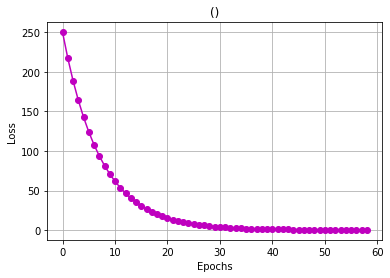

In [12]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

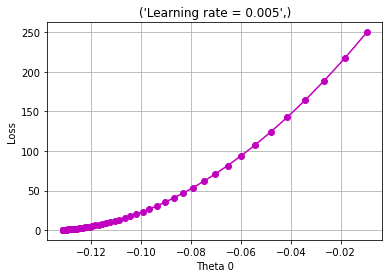

In [13]:
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')

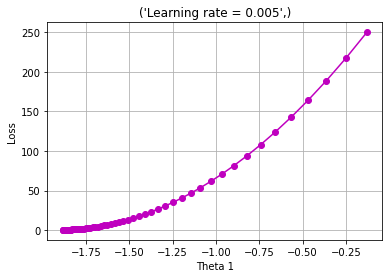

In [14]:
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')

#### Plot all regression lines till converge

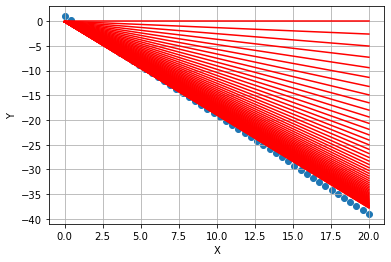

In [15]:
plot_lines(X, y, output,'X','Y','r')

#### Plot the best regression line

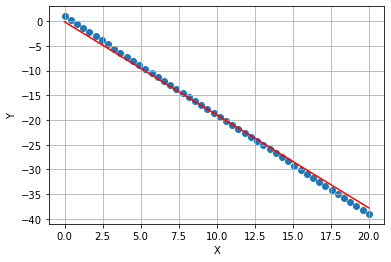

In [16]:
plot_best_fit(X, y,output,'X','Y','r')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [17]:
t0,t1,loss,output,epochs = GD_SV(X,y,0.00005,1000)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 

j = 249.88775510204084 

d_theta_0 : 19.0
d_theta_1 : 259.38775510204084
Gradient Vector:[[ 19.       ]
 [259.3877551]] 

Gradient Vector Norm: 260.08269357432516


Error Vector: [-1.04990815e+00 -5.12686060e-01  2.45360337e-02  5.61758128e-01
  1.09898022e+00  1.63620232e+00  2.17342441e+00  2.71064650e+00
  3.24786860e+00  3.78509069e+00  4.32231279e+00  4.85953488e+00
  5.39675697e+00  5.93397907e+00  6.47120116e+00  7.00842326e+00
  7.54564535e+00  8.08286745e+00  8.62008954e+00  9.15731163e+00
  9.69453373e+00  1.02317558e+01  1.07689779e+01  1.13062000e+01
  1.18434221e+01  1.23806442e+01  1.29178663e+01  1.34550884e+01
  1.39923105e+01  1.45295326e+01  1.50667547e+01  1.56039768e+01
  1.61411989e+01  1.66784210e+01  1.72156430e+01  1.77528651e+01
  1.82900872e+01  1.88273093e+01  1.93645314e+01  1.99017535e+01
  2.04389756e+01  2.09761977e+01  2.15134198e+01  2.20506419e+01
  2.25878640e+01  2.31250861e+01  2.36623082e+01  2.41995303e+01
  2.47367524e+01  2.52739745e+01] 

j = 103.40193762043802 

d_theta_0 : 12.11203315069096
d_theta_1 : 166.7842095046083
Gradient Vector:[[ 12.11203315]
 [166.7842095 ]] 

Gradient Vector Norm: 167.2234250


Error Vector: [-1.07203335 -0.65960503 -0.24717671  0.16525161  0.57767993  0.99010824
  1.40253656  1.81496488  2.2273932   2.63982152  3.05224984  3.46467815
  3.87710647  4.28953479  4.70196311  5.11439143  5.52681975  5.93924806
  6.35167638  6.7641047   7.17653302  7.58896134  8.00138966  8.41381797
  8.82624629  9.23867461  9.65110293 10.06353125 10.47595956 10.88838788
 11.3008162  11.71324452 12.12567284 12.53810116 12.95052947 13.36295779
 13.77538611 14.18781443 14.60024275 15.01267107 15.42509938 15.8375277
 16.24995602 16.66238434 17.07481266 17.48724098 17.89966929 18.31209761
 18.72452593 19.13695425] 

j = 58.50403328313379 

d_theta_0 : 9.03246045082377
d_theta_1 : 125.38101156477623
Gradient Vector:[[  9.03246045]
 [125.38101156]] 

Gradient Vector Norm: 125.70594020491731 

theta_0_new : -0.0724849708481147 

theta_1_new : -0.9958196707133046 

****************** Iteration 108 ********************
h(x):[ -0.07248497  -0.47894198  -0.88539899  -1.291856    -1.698313
 


Gradient Vector Norm: 86.50721617296819 

theta_0_new : -0.09300533009709923 

theta_1_new : -1.2825511578471747 

****************** Iteration 163 ********************
h(x):[ -0.09300533  -0.6164956   -1.13998587  -1.66347614  -2.1869664
  -2.71045667  -3.23394694  -3.75743721  -4.28092748  -4.80441775
  -5.32790802  -5.85139828  -6.37488855  -6.89837882  -7.42186909
  -7.94535936  -8.46884963  -8.99233989  -9.51583016 -10.03932043
 -10.5628107  -11.08630097 -11.60979124 -12.13328151 -12.65677177
 -13.18026204 -13.70375231 -14.22724258 -14.75073285 -15.27422312
 -15.79771339 -16.32120365 -16.84469392 -17.36818419 -17.89167446
 -18.41516473 -18.938655   -19.46214526 -19.98563553 -20.5091258
 -21.03261607 -21.55610634 -22.07959661 -22.60308688 -23.12657714
 -23.65006741 -24.17355768 -24.69704795 -25.22053822 -25.74402849] 

Error Vector: [-1.09300533 -0.80016907 -0.50733281 -0.21449654  0.07833972  0.37117598
  0.66401224  0.9568485   1.24968477  1.54252103  1.83535729  2.12819355
  2.


j = 12.226060872088171 

d_theta_0 : 3.947734805686472
d_theta_1 : 57.017255790461604
Gradient Vector:[[ 3.94773481]
 [57.01725579]] 

Gradient Vector Norm: 57.153758126399325 

theta_0_new : -0.10808304544350175 

theta_1_new : -1.4972888163505542 

****************** Iteration 224 ********************
h(x):[ -0.10808305  -0.71922134  -1.33035963  -1.94149792  -2.55263621
  -3.16377451  -3.7749128   -4.38605109  -4.99718938  -5.60832768
  -6.21946597  -6.83060426  -7.44174255  -8.05288085  -8.66401914
  -9.27515743  -9.88629572 -10.49743402 -11.10857231 -11.7197106
 -12.33084889 -12.94198719 -13.55312548 -14.16426377 -14.77540206
 -15.38654036 -15.99767865 -16.60881694 -17.21995523 -17.83109352
 -18.44223182 -19.05337011 -19.6645084  -20.27564669 -20.88678499
 -21.49792328 -22.10906157 -22.72019986 -23.33133816 -23.94247645
 -24.55361474 -25.16475303 -25.77589133 -26.38702962 -26.99816791
 -27.6093062  -28.2204445  -28.83158279 -29.44272108 -30.05385937] 

Error Vector: [-1.10808305 

Error Vector: [-1.11736384 -0.96776926 -0.81817469 -0.66858011 -0.51898554 -0.36939096
 -0.21979639 -0.07020181  0.07939276  0.22898734  0.37858191  0.52817649
  0.67777106  0.82736564  0.97696021  1.12655479  1.27614936  1.42574394
  1.57533851  1.72493309  1.87452766  2.02412224  2.17371681  2.32331139
  2.47290596  2.62250054  2.77209511  2.92168969  3.07128426  3.22087884
  3.37047341  3.52006799  3.66966256  3.81925714  3.96885171  4.11844629
  4.26804087  4.41763544  4.56723002  4.71682459  4.86641917  5.01601374
  5.16560832  5.31520289  5.46479747  5.61439204  5.76398662  5.91358119
  6.06317577  6.21277034] 

j = 5.575561083316667 

d_theta_0 : 2.5477032518571634
d_theta_1 : 38.19257139909792
Gradient Vector:[[ 2.54770325]
 [38.1925714 ]] 

Gradient Vector Norm: 38.2774516123359 

theta_0_new : -0.11749122239830062 

theta_1_new : -1.6354029196606679 

****************** Iteration 283 ********************
h(x):[ -0.11749122  -0.78500262  -1.45251401  -2.12002541  -2.78753681
 


j = 2.5925354655847572 

d_theta_0 : 1.6101511302737448
d_theta_1 : 25.58535713532818
Gradient Vector:[[ 1.61015113]
 [25.58535714]] 

Gradient Vector Norm: 25.635972507486635 

theta_0_new : -0.12350847020598059 

theta_1_new : -1.7279213585644453 

****************** Iteration 342 ********************
h(x):[ -0.12350847  -0.82878249  -1.53405652  -2.23933054  -2.94460457
  -3.64987859  -4.35515261  -5.06042664  -5.76570066  -6.47097469
  -7.17624871  -7.88152273  -8.58679676  -9.29207078  -9.9973448
 -10.70261883 -11.40789285 -12.11316688 -12.8184409  -13.52371492
 -14.22898895 -14.93426297 -15.639537   -16.34481102 -17.05008504
 -17.75535907 -18.46063309 -19.16590712 -19.87118114 -20.57645516
 -21.28172919 -21.98700321 -22.69227724 -23.39755126 -24.10282528
 -24.80809931 -25.51337333 -26.21864735 -26.92392138 -27.6291954
 -28.33446943 -29.03974345 -29.74501747 -30.4502915  -31.15556552
 -31.86083955 -32.56611357 -33.27138759 -33.97666162 -34.68193564] 

Error Vector: [-1.12350847 -

Gradient Vector:[[ 0.99974635]
 [17.37634011]] 

Gradient Vector Norm: 17.405076511077162 

theta_0_new : -0.12715630286524612 

theta_1_new : -1.7881835503435968 

****************** Iteration 399 ********************
h(x):[ -0.1271563   -0.85702714  -1.58689798  -2.31676881  -3.04663965
  -3.77651049  -4.50638132  -5.23625216  -5.966123    -6.69599383
  -7.42586467  -8.15573551  -8.88560635  -9.61547718 -10.34534802
 -11.07521886 -11.80508969 -12.53496053 -13.26483137 -13.9947022
 -14.72457304 -15.45444388 -16.18431471 -16.91418555 -17.64405639
 -18.37392722 -19.10379806 -19.8336689  -20.56353974 -21.29341057
 -22.02328141 -22.75315225 -23.48302308 -24.21289392 -24.94276476
 -25.67263559 -26.40250643 -27.13237727 -27.8622481  -28.59211894
 -29.32198978 -30.05186061 -30.78173145 -31.51160229 -32.24147313
 -32.97134396 -33.7012148  -34.43108564 -35.16095647 -35.89082731] 

Error Vector: [-1.1271563  -1.04070061 -0.95424492 -0.86778922 -0.78133353 -0.69487783
 -0.60842214 -0.52196645 -0

In [18]:
r2_score(y,output[-1])

0.987030530511034

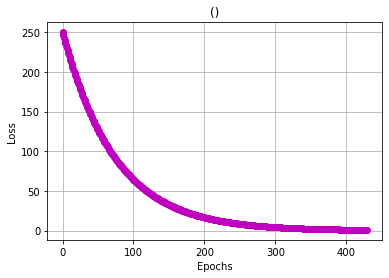

In [19]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')

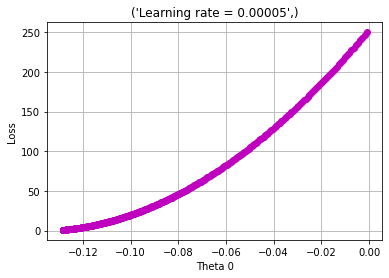

In [20]:
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.00005')

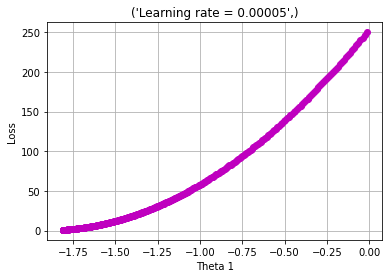

In [21]:
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.00005')

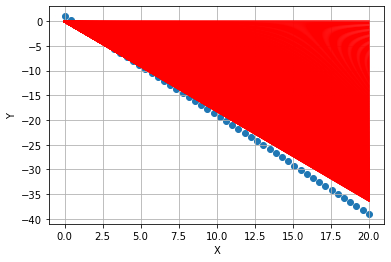

In [22]:
plot_lines(X, y, output,'X','Y','r')

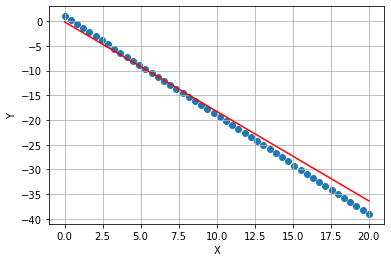

In [23]:
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [24]:
t0,t1,loss,output,epochs = GD_SV(X,y,0.005,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 

j = 249.88775510204084 

d_theta_0 : 19.0
d_theta_1 : 259.38775510204084
Gradient Vector:[[ 19.       ]
 [259.3877551]] 

Gradient Vector Norm: 260.08269357432516

In [25]:
r2_score(y,output[-1])

0.9975640989092417

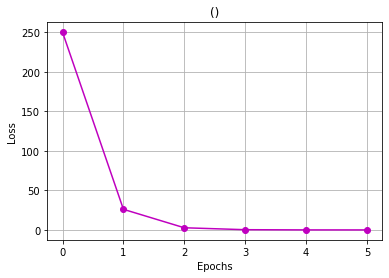

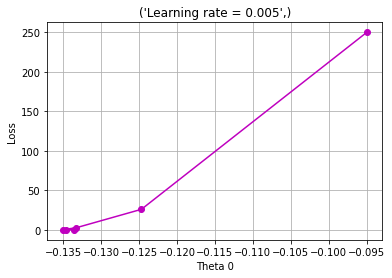

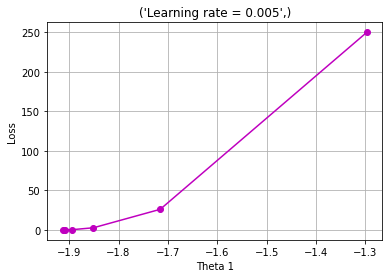

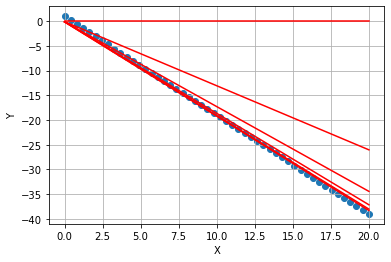

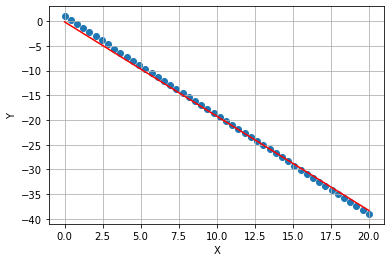

In [26]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [27]:
def GD_SV_stochastic(x,y,alpha,iterations):
    
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    X_shuffled = X[shuffled_index]
    y_shuffled = y[shuffled_index]

    theta_0 = 0
    theta_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    m = len(X_shuffled)
    steps = 0
    MSE = 1
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        old_MSE = MSE
        output_epoch = []
        for j in range(0,m):
            
            h = theta_0 + theta_1 * X_shuffled[j]
            error = h - y_shuffled[j]
            MSE = (error**2) / 2
            d_theta_0 = error
            d_theta_1 = error * X_shuffled[j]
            GV = np.array([[d_theta_0],[d_theta_1]])
            GVN = np.linalg.norm(GV,2)
            loss.append(MSE)
            th_0.append(theta_0)
            th_1.append(theta_1)
            output_epoch.append(h)
            theta_0 = theta_0 - alpha * d_theta_0
            theta_1 = theta_1 - alpha * d_theta_1
            steps += 1
          
        output.append(output_epoch)
        print(f"h(x):{h} \n")
        print(f"Error: {error} \n")
        print(f"j = {MSE} \n")
        print(f"d_theta_0 : {d_theta_0} \n")
        print(f"d_theta_1 : {d_theta_1} \n")
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        if i > 0 and abs(MSE - old_MSE) < 0.01:
            break
        if GVN < 0.01:
            break
    
    steps = np.arange(steps)
  
        
    return X_shuffled,y_shuffled,th_0,th_1,loss,output,steps

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [28]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_stochastic(X,y,0.0005,300)

****************** Iteration 0 ********************
h(x):-3.9440861718758065 

Error: -0.8624535188145819 

j = 0.37191303605782716 

d_theta_0 : -0.8624535188145819 

d_theta_1 : -1.7601092220705754 

Gradient Vector:[[-0.86245352]
 [-1.76010922]] 

Gradient Vector Norm: 1.9600537099104047 

theta_0_new : -0.13663808590200285 

theta_1_new : -1.864558206404019 

****************** Iteration 1 ********************
h(x):-4.044208440212441 

Error: -0.9625757871512164 

j = 0.46327607300489193 

d_theta_0 : -0.9625757871512164 

d_theta_1 : -1.964440381941258 

Gradient Vector:[[-0.96257579]
 [-1.96444038]] 

Gradient Vector Norm: 2.1875964344941 

theta_0_new : -0.13318686078152644 

theta_1_new : -1.9151825226623256 

****************** Iteration 2 ********************
h(x):-4.040869483454772 

Error: -0.9592368303935475 

j = 0.46006764839172964 

d_theta_0 : -0.9592368303935475 

d_theta_1 : -1.9576261844766276 

Gradient Vector:[[-0.95923683]
 [-1.95762618]] 

Gradient Vector Norm: 

In [29]:
r2_score(y_shuffled,output[-1])

0.9975849405974403

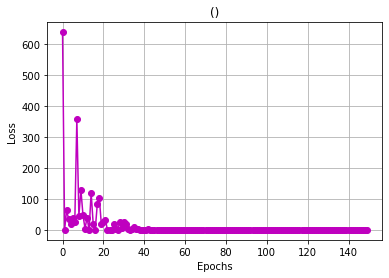

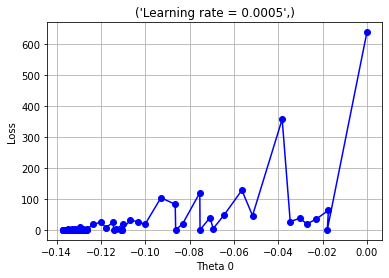

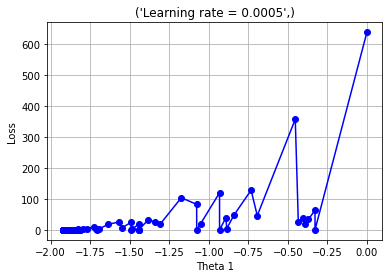

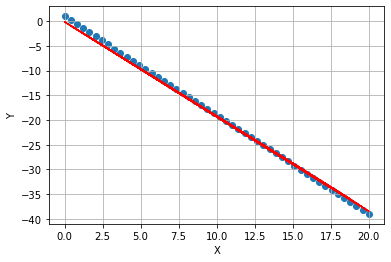

In [30]:
plot_line(steps, loss, 'Epochs', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0005')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0005')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [31]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_stochastic(X,y,0.0001,300)

****************** Iteration 0 ********************
h(x):-14.433899584438059 

Error: 15.58650857882725 

j = 121.46962483892773 

d_theta_0 : 15.58650857882725 

d_theta_1 : 241.74992897772879 

Gradient Vector:[[ 15.58650858]
 [241.74992898]] 

Gradient Vector Norm: 242.2518677129544 

theta_0_new : -0.0689398325768211 

theta_1_new : -0.9504373635994005 

****************** Iteration 1 ********************
h(x):-22.079534693114628 

Error: 7.940873470150681 

j = 31.528735734471457 

d_theta_0 : 7.940873470150681 

d_theta_1 : 123.16456810845955 

Gradient Vector:[[  7.94087347]
 [123.16456811]] 

Gradient Vector Norm: 123.42029131715867 

theta_0_new : -0.10294331450723003 

theta_1_new : -1.4292794671158016 

****************** Iteration 2 ********************
h(x):-25.93118045128444 

Error: 4.089227711980868 

j = 8.360891640216144 

d_theta_0 : 4.089227711980868 

d_theta_1 : 63.42475634909102 

Gradient Vector:[[ 4.08922771]
 [63.42475635]] 

Gradient Vector Norm: 63.556443428

In [32]:
r2_score(y_shuffled,output[-1])

0.997614722822441

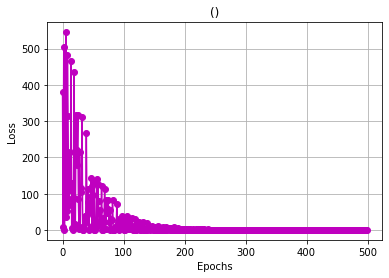

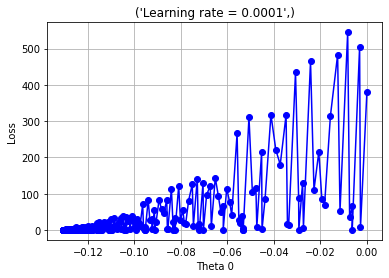

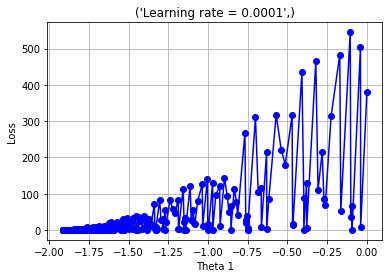

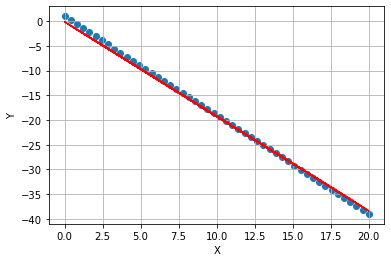

In [33]:
plot_line(steps, loss, 'Epochs', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0001')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0001')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [34]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_stochastic(X,y,0.00007,300)

****************** Iteration 0 ********************
h(x):-9.647493305306108 

Error: 16.291282204897975 

j = 132.7029379398127 

d_theta_0 : 16.291282204897975 

d_theta_1 : 219.43359704556457 

Gradient Vector:[[ 16.2912822 ]
 [219.43359705]] 

Gradient Vector Norm: 220.0375181377822 

theta_0_new : -0.05265961837592775 

theta_1_new : -0.7277887302137072 

****************** Iteration 1 ********************
h(x):-15.836191331741844 

Error: 10.102584178462237 

j = 51.03110354145776 

d_theta_0 : 10.102584178462237 

d_theta_1 : 136.07562362826687 

Gradient Vector:[[ 10.10258418]
 [136.07562363]] 

Gradient Vector Norm: 136.4501284459075 

theta_0_new : -0.08491600798987892 

theta_1_new : -1.178990661423037 

****************** Iteration 2 ********************
h(x):-19.672709645336404 

Error: 6.266065864867677 

j = 19.631790711429957 

d_theta_0 : 6.266065864867677 

d_theta_1 : 84.40007083291157 

Gradient Vector:[[ 6.26606586]
 [84.40007083]] 

Gradient Vector Norm: 84.6323551

In [35]:
r2_score(y_shuffled,output[-1])

0.9975483681942076

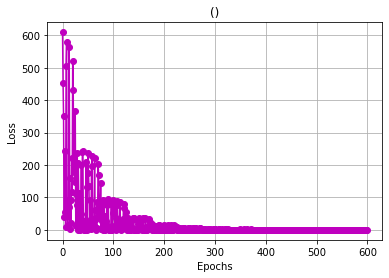

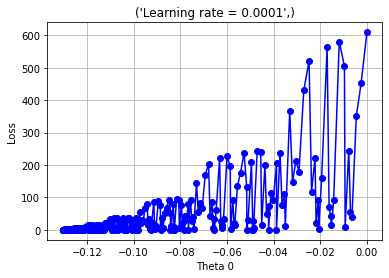

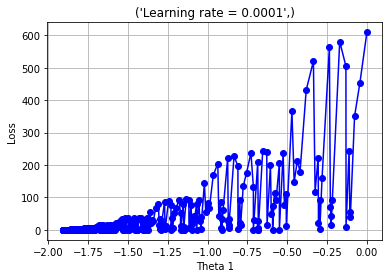

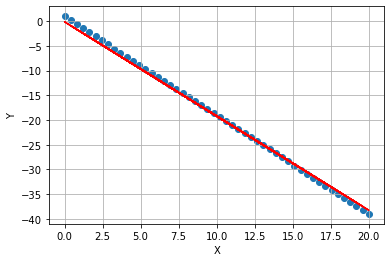

In [36]:
plot_line(steps, loss, 'Epochs', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0001')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0001')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [37]:
def GD_SV_minibatch(x,y,alpha,iterations,batch_size):
    
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    X_shuffled = X[shuffled_index]
    y_shuffled = y[shuffled_index]
    X_batches = np.array_split(X_shuffled,np.arange(batch_size, len(X_shuffled), batch_size))
    y_batches = np.array_split(y_shuffled,np.arange(batch_size, len(y_shuffled), batch_size))
    
    theta_0 = 0
    theta_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    steps = 0
    MSE = 1
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        old_MSE = MSE
        #output_epoch = []
        for j in range(0,len(X_batches)):
            m = len(X_batches[j])
            h = theta_0 + theta_1 * X_batches[j]
            error = h - y_batches[j]
            MSE = (error@error) / (m * 2)
            d_theta_0 = np.sum(error)/ m
            d_theta_1 = error @ X_batches[j] / m
            GV = np.array([[d_theta_0],[d_theta_1]])
            GVN = np.linalg.norm(GV,2)
            loss.append(MSE)
            th_0.append(theta_0)
            th_1.append(theta_1)
            #output_epoch.append(h)
            theta_0 = theta_0 - alpha * d_theta_0
            theta_1 = theta_1 - alpha * d_theta_1
            steps += 1
          
        #output_epoch = np.concatenate(output_epoch).ravel().tolist()
        #output.append(output_epoch)
        print(f"h(x):{h} \n")
        print(f"Error: {error} \n")
        print(f"j = {MSE} \n")
        print(f"d_theta_0 : {d_theta_0} \n")
        print(f"d_theta_1 : {d_theta_1} \n")
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        h_batch = np.array(theta_0+theta_1*X_shuffled)
        output.append(h_batch)
        if i > 0 and abs(MSE - old_MSE) < 0.01:
            break
        if GVN < 0.01:
            break
    
    steps = np.arange(steps)
  
        
    return X_shuffled,y_shuffled,th_0,th_1,loss,output,steps

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [38]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_minibatch(X,y,0.0005,300,5)

****************** Iteration 0 ********************
h(x):[-10.23920611 -13.87313477 -14.5999205   -8.05884892  -6.60527746] 

Error: [11.61793674 16.14727339 17.05314072  8.90033476  7.0886001 ] 

j = 81.59847106464704 

d_theta_0 : 12.16145714121311 

d_theta_1 : 158.72868676211226 

Gradient Vector:[[ 12.16145714]
 [158.72868676]] 

Gradient Vector Norm: 159.19389762494768 

theta_0_new : -0.07028659805444883 

theta_1_new : -0.969676864743812 

****************** Iteration 1 ********************
h(x):[-16.20822521 -21.96070748 -23.11120393 -12.75673586 -10.45574295] 

Error: [5.64891764 8.05970068 8.54185729 4.20244782 3.2381346 ] 

j = 19.79784549851251 

d_theta_0 : 5.938211607196095 

d_theta_1 : 78.11043970898449 

Gradient Vector:[[ 5.93821161]
 [78.11043971]] 

Gradient Vector Norm: 78.3358356604609 

theta_0_new : -0.10424397957681013 

theta_1_new : -1.4484133747046704 

****************** Iteration 2 ********************
h(x):[-19.15472294 -25.95325424 -27.3129605  -15.0756

In [39]:
r2_score(y_shuffled,output[-1])

0.9975815475849753

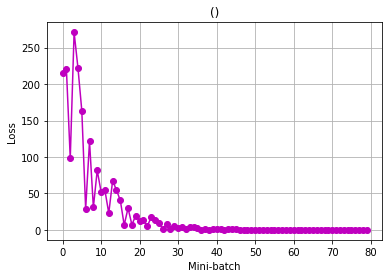

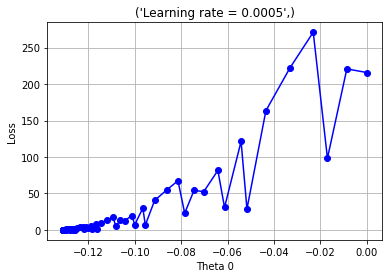

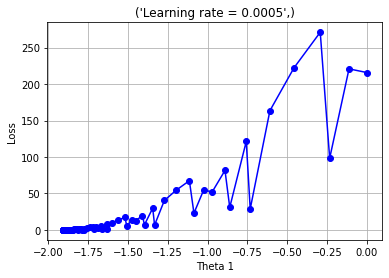

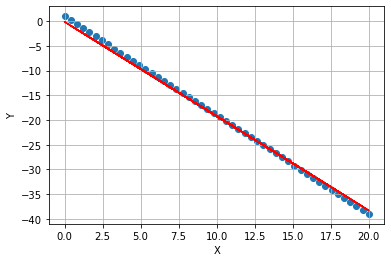

In [40]:
plot_line(steps, loss, 'Mini-batch', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0005')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0005')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [41]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_minibatch(X,y,0.0005,300,10)

****************** Iteration 0 ********************
h(x):[-7.11635219 -0.96554238 -3.76136502 -7.30274037 -8.23468125 -0.40637785
 -4.50691773 -5.43885861 -8.42106942 -3.20220049] 

Error: [22.90405597  2.11609027 11.56516559 23.53399433 26.6836861   0.22627521
 14.08491901 17.23461078 27.31362445  9.67535053] 

j = 163.1904553514703 

d_theta_0 : 15.533777222931016 

d_theta_1 : 221.87894839325745 

Gradient Vector:[[ 15.53377722]
 [221.87894839]] 

Gradient Vector Norm: 222.4220447143436 

theta_0_new : -0.041368390508528946 

theta_1_new : -0.567590505533937 

****************** Iteration 1 ********************
h(x):[-13.85082199  -1.87877511  -7.3206146  -14.21361129 -16.02755779
  -0.79040721  -8.7717718  -10.5857183  -16.39034709  -6.2322467 ] 

Error: [16.16958617  1.20285755  8.00591601 16.6231234  18.89080956 -0.15775415
  9.82006494 12.08775109 19.34434679  6.64530432] 

j = 81.05620509801767 

d_theta_0 : 10.863200567299858 

d_theta_1 : 156.3041194376504 

Gradient Vector:[

In [42]:
r2_score(y_shuffled,output[-1])

0.997580991155482

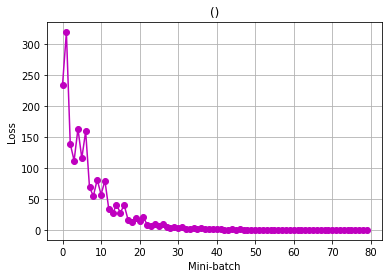

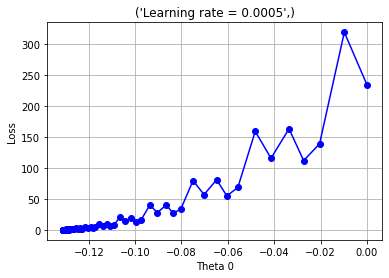

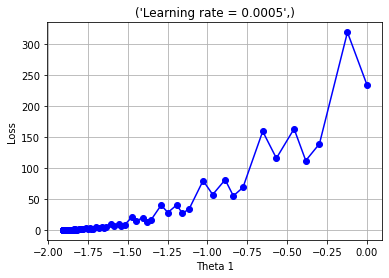

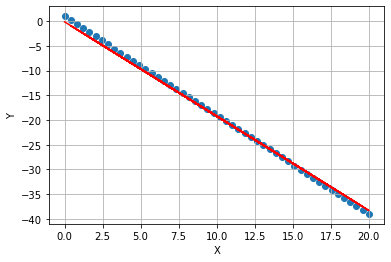

In [43]:
plot_line(steps, loss, 'Mini-batch', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0005')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0005')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [44]:
x_shuffled,y_shuffled,ts_0,ts_1,loss,output,steps = GD_SV_minibatch(X,y,0.0005,300,20)

****************** Iteration 0 ********************
h(x):[-2.22872154 -2.67062089 -0.01922481 -4.10679376 -1.34492285 -2.56014605
 -4.54869311 -0.9030235  -0.79254867 -2.78109573] 

Error: [13.09780907 15.92121585 -1.01922481 25.09728787  7.45099552 15.21536415
 27.92069464  4.62758874  3.92173705 16.62706754] 

j = 121.78970989259642 

d_theta_0 : 12.886053561146886 

d_theta_1 : 148.44605602709854 

Gradient Vector:[[ 12.88605356]
 [148.44605603]] 

Gradient Vector Norm: 149.00430170428376 

theta_0_new : -0.025667838504430003 

theta_1_new : -0.344886377580386 

****************** Iteration 1 ********************
h(x):[-4.66891463 -5.59442058 -0.04138484 -8.60231494 -2.81790271 -5.36304409
 -9.5278209  -1.89239676 -1.66102027 -5.82579707] 

Error: [10.65761598 12.99741615 -1.04138484 20.60176669  5.97801565 12.41246611
 22.94156686  3.63821549  3.05326545 13.58236619] 

j = 81.5598033657283 

d_theta_0 : 10.482130972516476 

d_theta_1 : 121.43757392416535 

Gradient Vector:[[ 10.482

In [45]:
r2_score(y_shuffled,output[-1])

0.9969250462227761

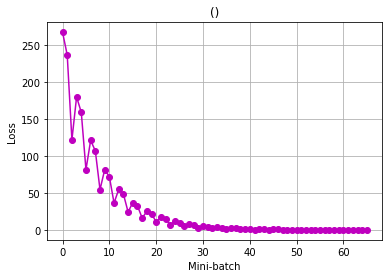

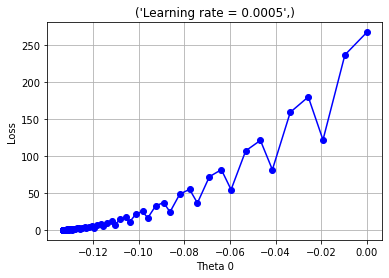

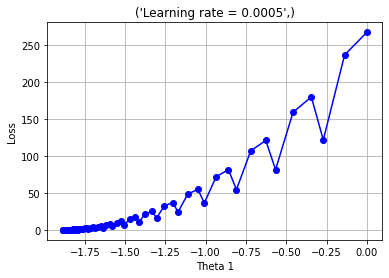

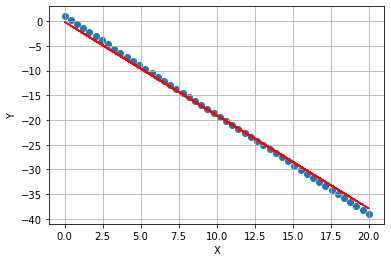

In [46]:
plot_line(steps, loss, 'Mini-batch', 'Loss','-mo')
plot_line(ts_0, loss, 'Theta 0', 'Loss','-bo','Learning rate = 0.0005')
plot_line(ts_1, loss, 'Theta 1', 'Loss','-bo','Learning rate = 0.0005')
#plot_lines(X, y, output,'X','Y','r')
plot_best_fit(x_shuffled, y_shuffled,output,'X','Y','r')